# Placeholder for Text

In [183]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, auc, roc_curve,r2_score
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

import tensorflow as tf
from tensorflow import keras
from keras_visualizer import visualizer 
import import_ipynb

# Data

In [155]:
#Run the Data Cleaning file and import the data

import Data_Cleaning_v3 as data_cleaned


In [156]:
#Run the Data Cleaning file and import the data with Macro variables
import Data_Cleaning_v3_macro as data_cleaned_macro

In [157]:
#Define the datasets from the previously imported data
data = data_cleaned.data_final_scaled
data_macro = data_cleaned_macro.data_final_scaled

In [158]:
#Define the train and test sets

tt_split = 0.2

#Dataset without Macro variables
train_set, test_set = train_test_split(data, test_size=tt_split, random_state=42)

#Dataset with Macro variables
train_set_macro, test_set_macro = train_test_split(data_macro, test_size=tt_split, random_state=42)

In [159]:
#Check de ratio of the defaul and non-default
d_nd_ratio = ratio =len(train_set[train_set["remainder__loan_status"]==0])/len(train_set)
d_nd_ratio_macro =len(train_set_macro[train_set_macro["remainder__loan_status"]==0])/len(train_set_macro)

print(f"Probability of Payback in the whole datasets")
print(f"Without Macro:",d_nd_ratio)
print(f"With Macro variables:", d_nd_ratio_macro)

Probability of Payback in the whole datasets
Without Macro: 0.8041398509577903
With Macro variables: 0.8041398509577903


In [160]:
#Defining the datasets

#Without Macro variables
Y_train = train_set["remainder__loan_status"]
X_train = train_set.drop("remainder__loan_status", axis=1)
Y_test = test_set["remainder__loan_status"]
X_test = test_set.drop("remainder__loan_status", axis=1)

#With Macro variables
Y_train_macro = train_set_macro["remainder__loan_status"]
X_train_macro = train_set_macro.drop("remainder__loan_status", axis=1)
Y_test_macro = test_set_macro["remainder__loan_status"]
X_test_macro = test_set_macro.drop("remainder__loan_status", axis=1)

In [161]:
#Balanced Datasets fot training

#50/50 Split
train_set_d = train_set[train_set["remainder__loan_status"] == 1].sample(len(train_set[train_set["remainder__loan_status"]==1]))
train_set_bal_nd = train_set[train_set["remainder__loan_status"] == 0].sample(len(train_set[train_set["remainder__loan_status"]==1]))
train_set_balanced = train_set_d.append(train_set_bal_nd)

Y_train_bal = train_set_balanced["remainder__loan_status"]
X_train_bal = train_set_balanced.drop("remainder__loan_status", axis=1)


train_set_d_macro = train_set_macro[train_set_macro["remainder__loan_status"] == 1].sample(len(train_set_macro[train_set_macro["remainder__loan_status"]==1]))
train_set_bal_nd_macro = train_set_macro[train_set_macro["remainder__loan_status"] == 0].sample(len(train_set_macro[train_set_macro["remainder__loan_status"]==1]))
train_set_balanced_macro = train_set_d_macro.append(train_set_bal_nd_macro)

Y_train_bal_macro = train_set_balanced_macro["remainder__loan_status"]
X_train_bal_macro = train_set_balanced_macro.drop("remainder__loan_status", axis=1)

In [173]:
#Variable definition for the training of the Neural Network
dim = X_train.shape[1]
dim_macro= X_train_macro.shape[1]

batch_size = 100
epochs = 10
lr=0.001

## Models

### Full Dataset

#### Basic Model

In [174]:
#Basic Model 

Basic_model = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(16, activation="relu", kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

visualizer(Basic_model, file_name="Models/Basic Model", file_format="png", view=False)

Basic_model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])


In [179]:
#Fit the basic model and evaluate it on the whole dataset
Basic_history = Basic_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

Epoch 1/10
2535/2535 [==============================] - 12s 5ms/step - loss: 0.4360 - accuracy: 0.8118 - val_loss: 0.4486 - val_accuracy: 0.8058
Epoch 2/10
2535/2535 [==============================] - 9s 3ms/step - loss: 0.4359 - accuracy: 0.8121 - val_loss: 0.4489 - val_accuracy: 0.8056
Epoch 3/10
2535/2535 [==============================] - 9s 4ms/step - loss: 0.4359 - accuracy: 0.8120 - val_loss: 0.4488 - val_accuracy: 0.8056
Epoch 4/10
2535/2535 [==============================] - 9s 4ms/step - loss: 0.4358 - accuracy: 0.8122 - val_loss: 0.4491 - val_accuracy: 0.8057
Epoch 5/10
2535/2535 [==============================] - 9s 4ms/step - loss: 0.4356 - accuracy: 0.8120 - val_loss: 0.4499 - val_accuracy: 0.8056
Epoch 6/10
2535/2535 [==============================] - 9s 3ms/step - loss: 0.4357 - accuracy: 0.8119 - val_loss: 0.4490 - val_accuracy: 0.8059
Epoch 7/10
2535/2535 [==============================] - 9s 3ms/step - loss: 0.4354 - accuracy: 0.8124 - val_loss: 0.4488 - val_accuracy

[0.4537985920906067, 0.8043708801269531]

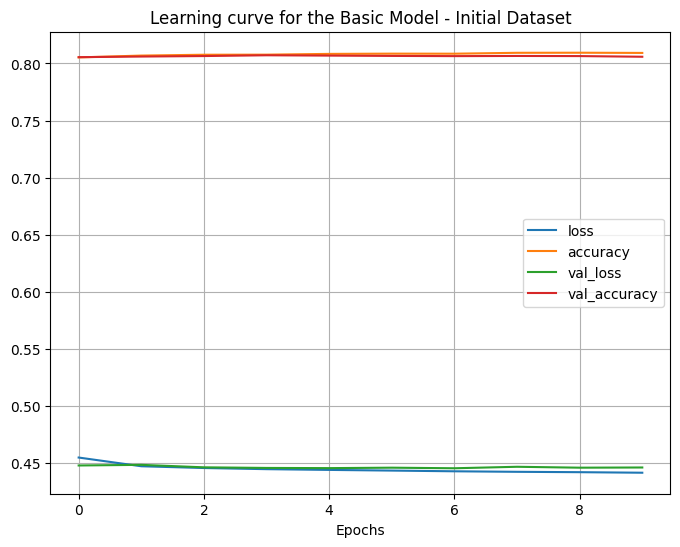

In [176]:
#Plot the learning curve
pd.DataFrame(Basic_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Basic Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 4s 1ms/step


0.8016943160871651

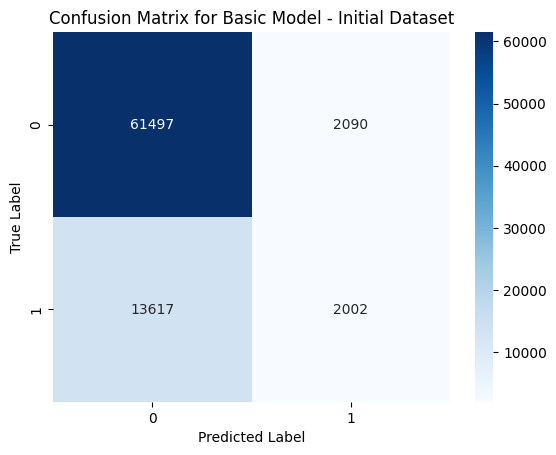

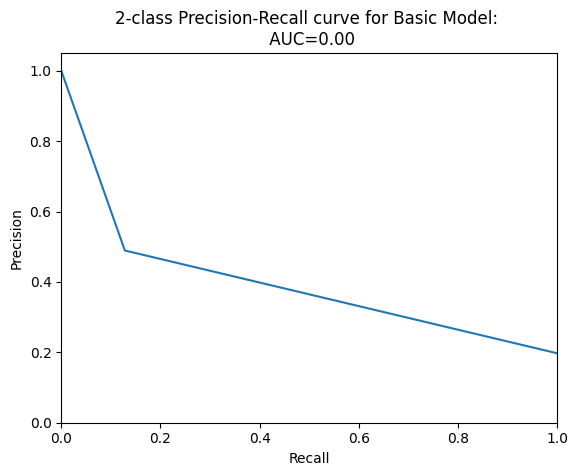

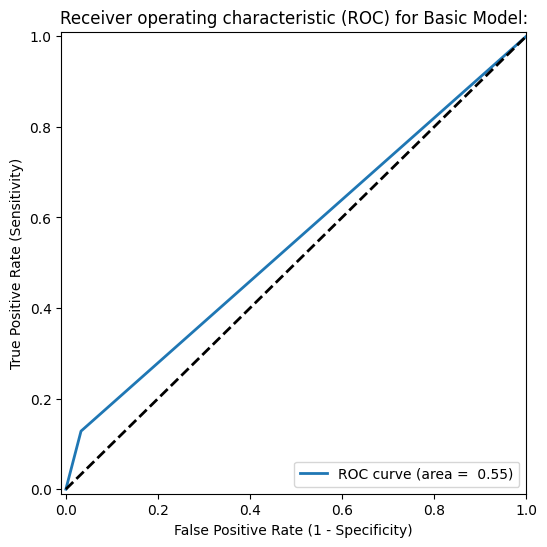

Classification report for the Basic Model
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     63587
         1.0       0.49      0.13      0.20     15619

    accuracy                           0.80     79206
   macro avg       0.65      0.55      0.54     79206
weighted avg       0.75      0.80      0.75     79206



In [166]:
#Confusion Matrix
y_pred = Basic_model.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Basic Model - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Basic Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Basic Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Basic Model")
print(classification_report(Y_test , y_prediction))

#### Complex Model

In [167]:
#Complex Model
Complex_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu',kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

visualizer(Complex_model, file_name="Models/Complex_model", file_format="png", view=False)

Complex_model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [168]:
#Fit the Complex model and evaluate it on the whole dataset
Complex_model_history = Complex_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

Epoch 1/100
2535/2535 [==============================] - 16s 4ms/step - loss: 0.5058 - accuracy: 0.7866 - val_loss: 0.4594 - val_accuracy: 0.8037
Epoch 2/100
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4647 - accuracy: 0.8046 - val_loss: 0.4545 - val_accuracy: 0.8037
Epoch 3/100
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4574 - accuracy: 0.8053 - val_loss: 0.4513 - val_accuracy: 0.8038
Epoch 4/100
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4538 - accuracy: 0.8059 - val_loss: 0.4497 - val_accuracy: 0.8041
Epoch 5/100
2535/2535 [==============================] - 11s 4ms/step - loss: 0.4525 - accuracy: 0.8058 - val_loss: 0.4486 - val_accuracy: 0.8033
Epoch 6/100
2535/2535 [==============================] - 13s 5ms/step - loss: 0.4514 - accuracy: 0.8056 - val_loss: 0.4487 - val_accuracy: 0.8034
Epoch 7/100
2535/2535 [==============================] - 15s 6ms/step - loss: 0.4508 - accuracy: 0.8056 - val_loss: 0.4480 -

[0.455646812915802, 0.8016943335533142]

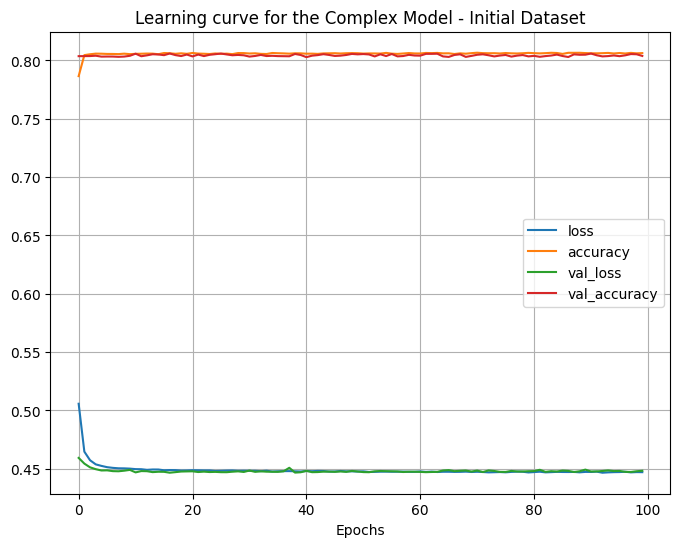

In [169]:
#Plot the learning curve
pd.DataFrame(Complex_model_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 4s 2ms/step


0.8041941267075726

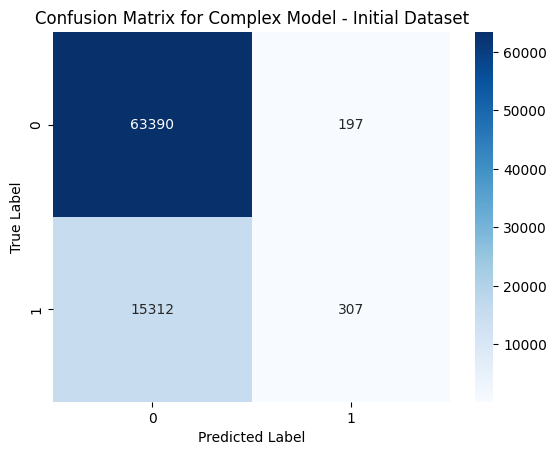

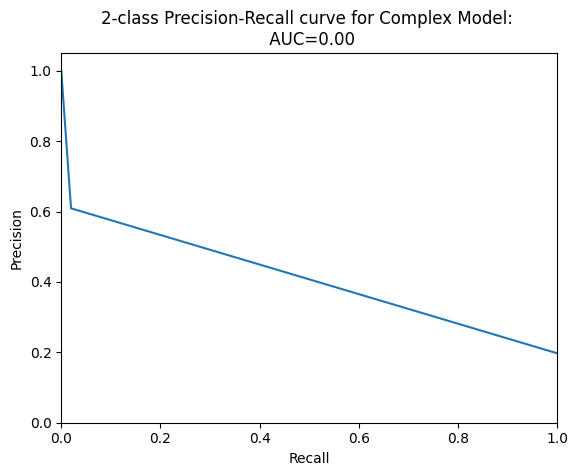

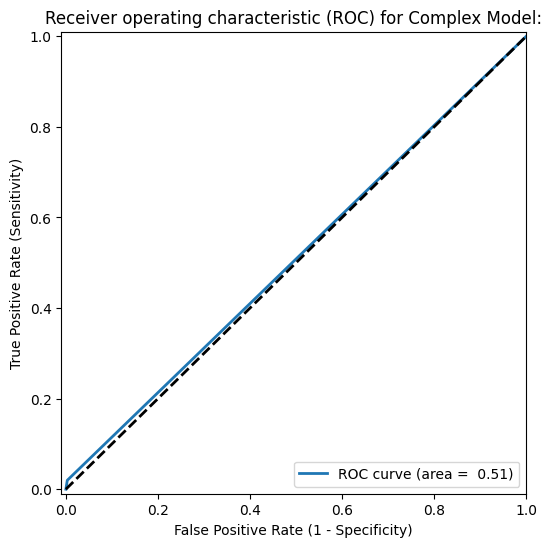

Classification report for the Complex Model
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89     63587
         1.0       0.61      0.02      0.04     15619

    accuracy                           0.80     79206
   macro avg       0.71      0.51      0.46     79206
weighted avg       0.77      0.80      0.72     79206



In [170]:
#Confusion Matrix
y_pred = Complex_model.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Model - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Model")
print(classification_report(Y_test , y_prediction))

#### Complex Wide Model

In [171]:
#Coplex Model with more neurons to make it wider
Complex_wide_model= keras.models.Sequential([
    keras.layers.Dense(256, activation='relu',kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

visualizer(Complex_wide_model, file_name="Models/Complex wide model", file_format="png", view=False)

Complex_wide_model.compile(loss="binary_crossentropy",
                           optimizer=keras.optimizers.Adam(learning_rate=lr),
                           metrics=["accuracy"])

In [172]:
#Fit the Complex wide model and evaluate it on the whole dataset
Complex_wide_model_history = Complex_wide_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                                                    validation_split=(0.2),
                                                    shuffle=True)
print("Evaluation - Full Dataset")
Complex_wide_model.evaluate(X_test, Y_test)

Epoch 1/100
2535/2535 [==============================] - 30s 10ms/step - loss: 0.7071 - accuracy: 0.7939 - val_loss: 0.5283 - val_accuracy: 0.8048
Epoch 2/100
2535/2535 [==============================] - 25s 10ms/step - loss: 0.4959 - accuracy: 0.8051 - val_loss: 0.4761 - val_accuracy: 0.8049
Epoch 3/100
2535/2535 [==============================] - 25s 10ms/step - loss: 0.4751 - accuracy: 0.8054 - val_loss: 0.4737 - val_accuracy: 0.8018
Epoch 4/100
2535/2535 [==============================] - 25s 10ms/step - loss: 0.4693 - accuracy: 0.8057 - val_loss: 0.4647 - val_accuracy: 0.8055
Epoch 5/100
2535/2535 [==============================] - 25s 10ms/step - loss: 0.4670 - accuracy: 0.8062 - val_loss: 0.4689 - val_accuracy: 0.8043
Epoch 6/100
2535/2535 [==============================] - 25s 10ms/step - loss: 0.4656 - accuracy: 0.8063 - val_loss: 0.4659 - val_accuracy: 0.8056
Epoch 7/100
2535/2535 [==============================] - 51s 20ms/step - loss: 0.4642 - accuracy: 0.8065 - val_loss: 0

KeyboardInterrupt: 

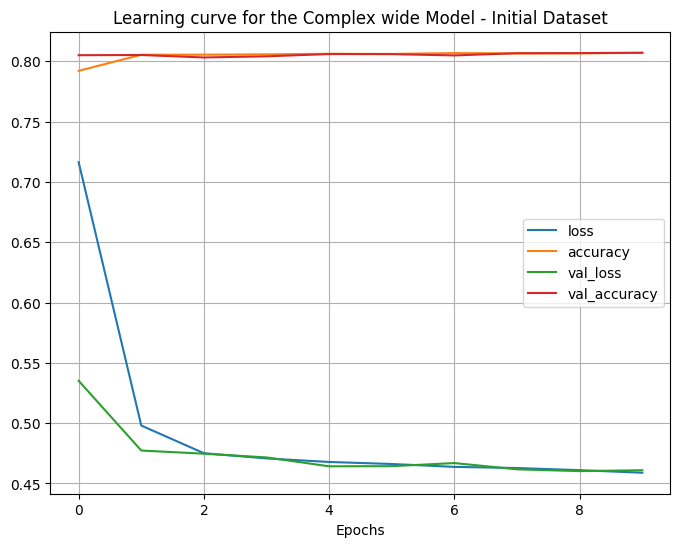

In [ ]:
#Plot the learning curve
pd.DataFrame(Complex_wide_model_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex wide Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 5s 2ms/step


0.8073757038608186

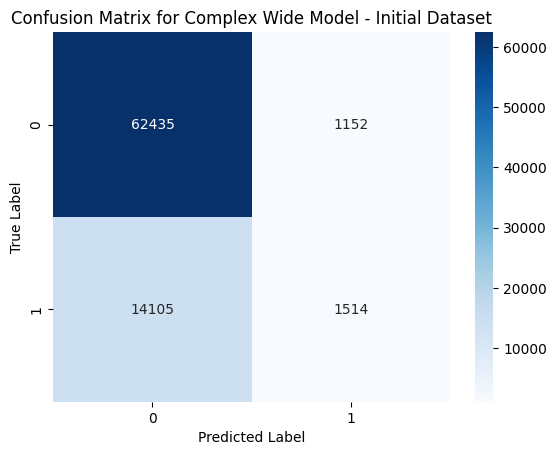

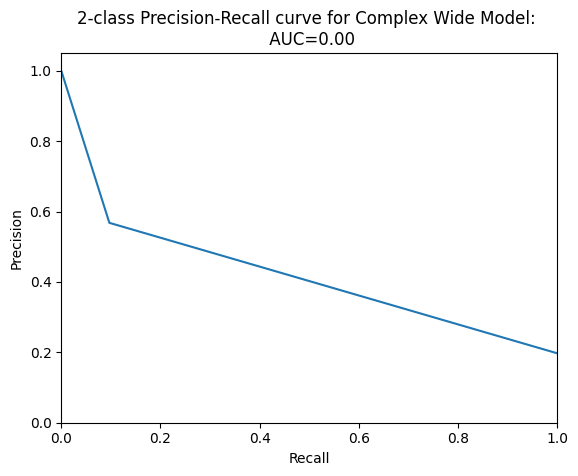

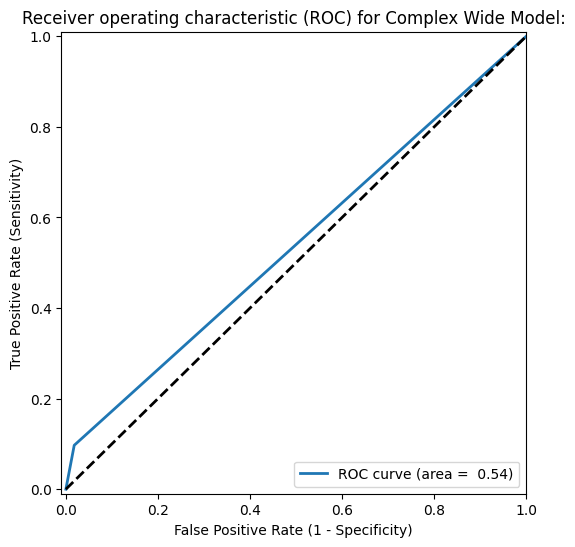

Classification report for the Complex Wide Model
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     63587
         1.0       0.57      0.10      0.17     15619

    accuracy                           0.81     79206
   macro avg       0.69      0.54      0.53     79206
weighted avg       0.77      0.81      0.75     79206



In [ ]:
#Confusion Matrix
y_pred = Complex_wide_model.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Wide Model - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Wide Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Wide Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Wide Model")
print(classification_report(Y_test , y_prediction))

#### Split model

In [ ]:
# define left and right branches
left_branch = keras.models.Sequential()
left_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim))
right_branch = keras.models.Sequential()
right_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim))

# concatenate the outputs of the two branches
input_layer = keras.layers.Input(shape=(dim,))
merged = keras.layers.Concatenate(axis=1)([left_branch(input_layer), right_branch(input_layer)])

# define the rest of the model
output_layer = keras.layers.Dense(1, activation='sigmoid')(merged)
Branched_model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

# visualize the model
visualizer(Branched_model, file_name="Models/Branched Model", file_format="png", view=False)

Branched_model.compile(loss="binary_crossentropy",
                       optimizer=keras.optimizers.Adam(learning_rate=lr),
                       metrics=["accuracy"])


In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Branched_model_history = Branched_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                                            validation_split=(0.2),
                                            shuffle=True)
print("Evaluation - Full Dataset")
Branched_model.evaluate(X_test, Y_test)

Epoch 1/10
2535/2535 [==============================] - 9s 3ms/step - loss: 0.4589 - accuracy: 0.8038 - val_loss: 0.4481 - val_accuracy: 0.8050
Epoch 2/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4474 - accuracy: 0.8065 - val_loss: 0.4475 - val_accuracy: 0.8057
Epoch 3/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4466 - accuracy: 0.8073 - val_loss: 0.4466 - val_accuracy: 0.8057
Epoch 4/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4460 - accuracy: 0.8074 - val_loss: 0.4464 - val_accuracy: 0.8064
Epoch 5/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4454 - accuracy: 0.8077 - val_loss: 0.4465 - val_accuracy: 0.8064
Epoch 6/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4450 - accuracy: 0.8077 - val_loss: 0.4461 - val_accuracy: 0.8067
Epoch 7/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4447 - accuracy: 0.8083 - val_loss: 0.4460 - val_accuracy:

[0.4470862150192261, 0.8061510324478149]

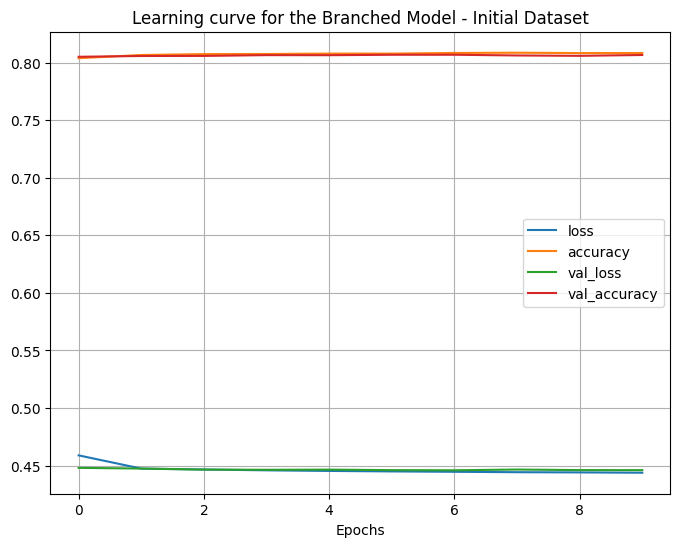

In [ ]:
#Plot the learning curve
pd.DataFrame(Branched_model_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Branched Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 3s 1ms/step


0.8068454410019443

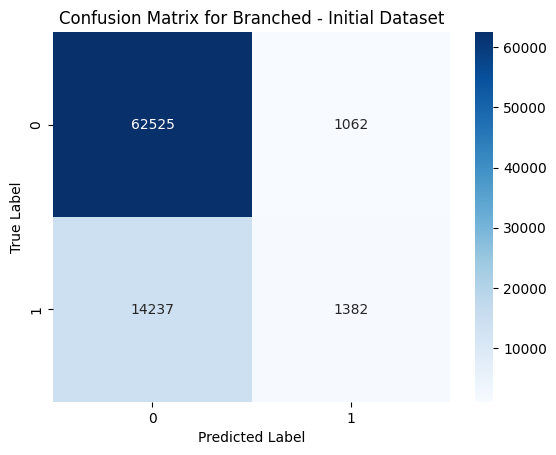

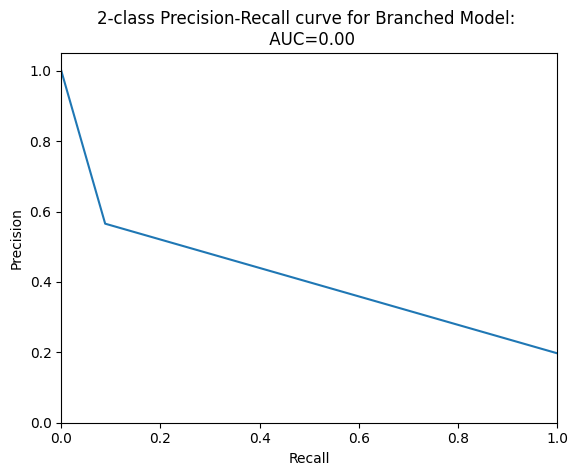

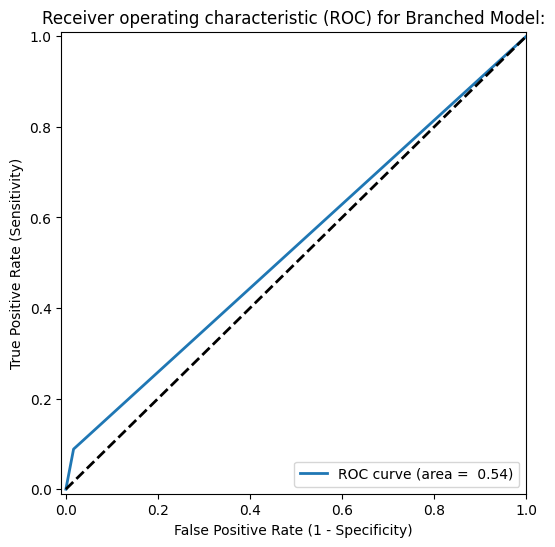

Classification report for the Branched Model
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89     63587
         1.0       0.57      0.09      0.15     15619

    accuracy                           0.81     79206
   macro avg       0.69      0.54      0.52     79206
weighted avg       0.77      0.81      0.75     79206



In [ ]:
#Confusion Matrix
y_pred = Branched_model.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Branched - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Branched Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Branched Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Branched Model")
print(classification_report(Y_test , y_prediction))

### Balanced Dataset

#### Basic Model

In [ ]:
#Basic Model 

Basic_model_bal = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(16, activation="relu", kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

visualizer(Basic_model, file_name="Models/Basic Model", file_format="png", view=False)

Basic_model_bal.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [ ]:
#Fit the basic model and evaluate it on the whole dataset
Basic_history_bal = Basic_model_bal.fit(X_train_bal, Y_train_bal, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Basic_model_bal.evaluate(X_test, Y_test)


Epoch 1/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5926 - accuracy: 0.6848 - val_loss: 0.8536 - val_accuracy: 0.4744
Epoch 2/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5843 - accuracy: 0.6913 - val_loss: 0.8330 - val_accuracy: 0.4861
Epoch 3/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5824 - accuracy: 0.6928 - val_loss: 0.8499 - val_accuracy: 0.4705
Epoch 4/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5813 - accuracy: 0.6944 - val_loss: 0.8329 - val_accuracy: 0.4687
Epoch 5/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5800 - accuracy: 0.6961 - val_loss: 0.8875 - val_accuracy: 0.4248
Epoch 6/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5792 - accuracy: 0.6966 - val_loss: 0.8848 - val_accuracy: 0.4241
Epoch 7/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5782 - accuracy: 0.6980 - val_loss: 0.8771 - val_accuracy: 0.4337
Epoch 

[0.790803074836731, 0.5062873959541321]

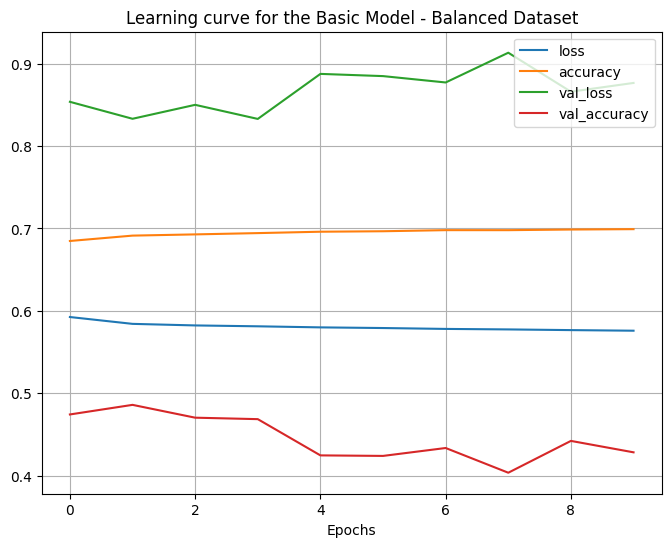

In [ ]:
#Plot the learning curve
pd.DataFrame(Basic_history_bal.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Basic Model - Balanced Dataset")    
plt.show()

2476/2476 [==============================] - 5s 2ms/step


0.5062874024695099

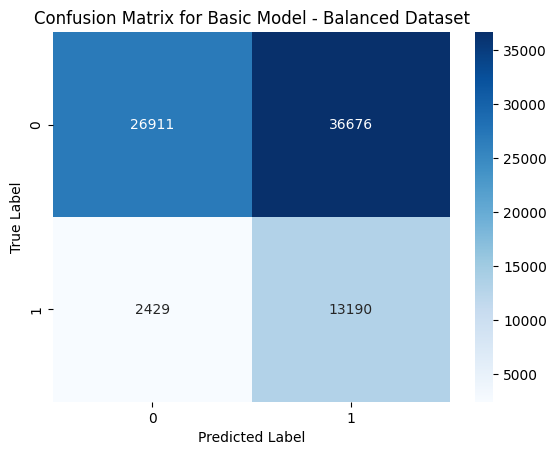

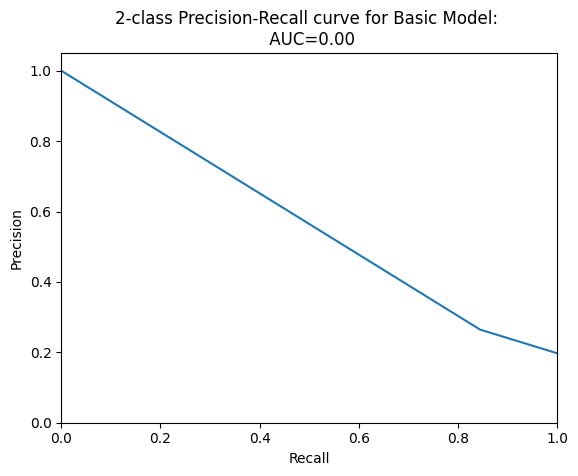

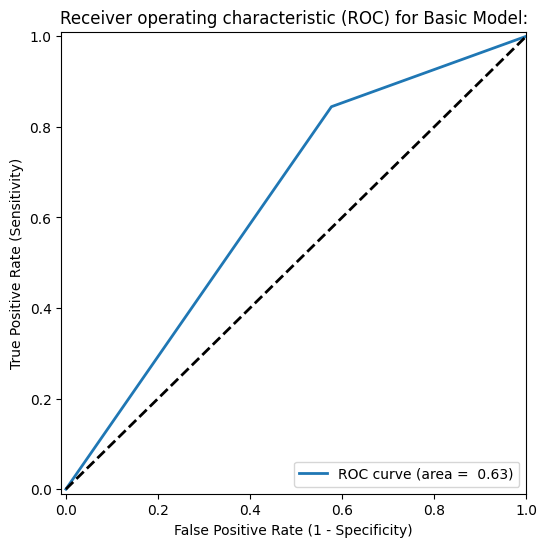

Classification report for the Basic Model - Balanced Dataset
              precision    recall  f1-score   support

         0.0       0.92      0.42      0.58     63587
         1.0       0.26      0.84      0.40     15619

    accuracy                           0.51     79206
   macro avg       0.59      0.63      0.49     79206
weighted avg       0.79      0.51      0.54     79206



In [ ]:
#Confusion Matrix
y_pred = Basic_model_bal.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Basic Model - Balanced Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Basic Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Basic Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Basic Model - Balanced Dataset")
print(classification_report(Y_test , y_prediction))

#### Complex Model

In [ ]:
#Complex Model
Complex_model_bal = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu',kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

Complex_model_bal.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [ ]:
#Fit the Complex model and evaluate it on the whole dataset
Complex_model_bal_history = Complex_model_bal.fit(X_train_bal, Y_train_bal, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Complex_model_bal.evaluate(X_test, Y_test)

Epoch 1/10
993/993 [==============================] - 4s 4ms/step - loss: 0.6364 - accuracy: 0.6382 - val_loss: 0.8541 - val_accuracy: 0.4371
Epoch 2/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5984 - accuracy: 0.6830 - val_loss: 0.8501 - val_accuracy: 0.4586
Epoch 3/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5963 - accuracy: 0.6845 - val_loss: 0.8349 - val_accuracy: 0.4463
Epoch 4/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5956 - accuracy: 0.6849 - val_loss: 0.8614 - val_accuracy: 0.4183
Epoch 5/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5949 - accuracy: 0.6855 - val_loss: 0.8860 - val_accuracy: 0.3972
Epoch 6/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5940 - accuracy: 0.6861 - val_loss: 0.8252 - val_accuracy: 0.4522
Epoch 7/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5939 - accuracy: 0.6873 - val_loss: 0.8171 - val_accuracy: 0.4643
Epoch 

[0.7976376414299011, 0.5009342432022095]

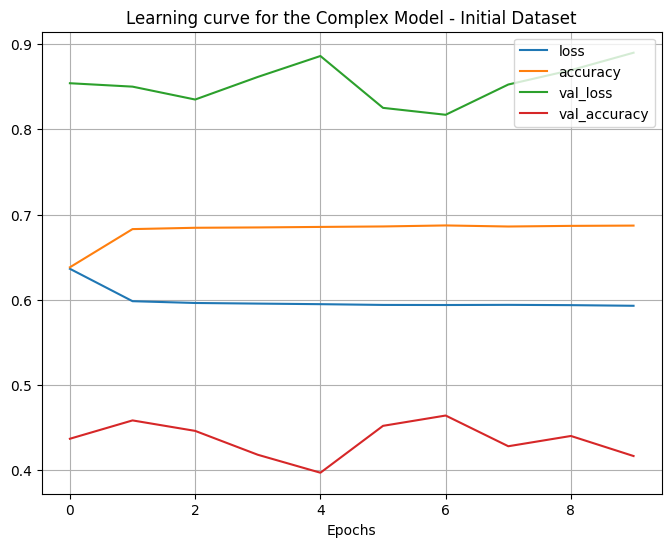

In [ ]:
#Plot the learning curve
pd.DataFrame(Complex_model_bal_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 4s 2ms/step


0.6705173850465874

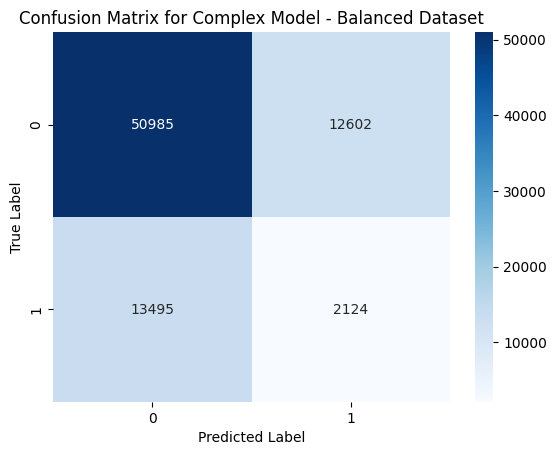

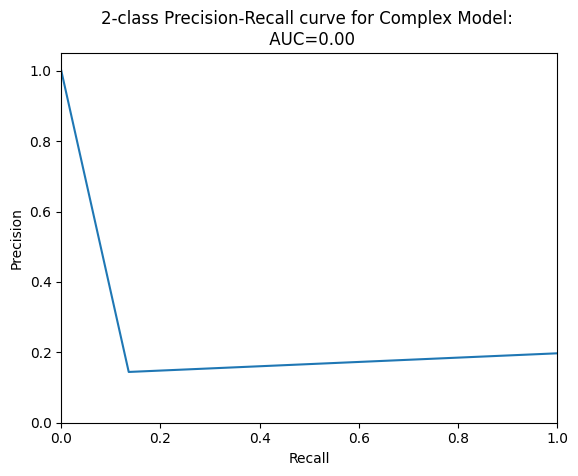

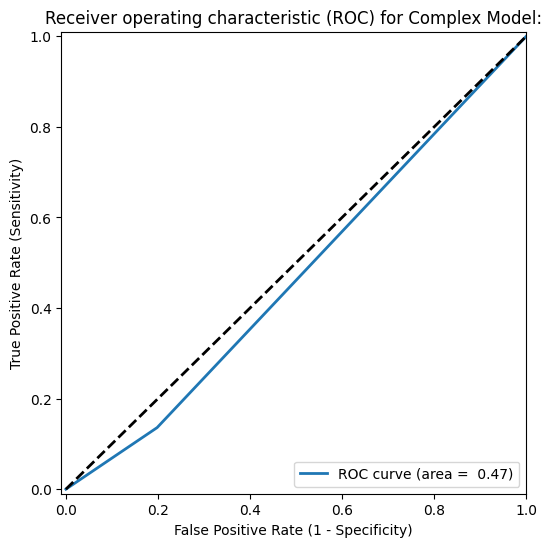

Classification report for the Complex Model
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80     63587
         1.0       0.14      0.14      0.14     15619

    accuracy                           0.67     79206
   macro avg       0.47      0.47      0.47     79206
weighted avg       0.66      0.67      0.67     79206



In [ ]:
#Confusion Matrix
y_pred = Complex_model_bal.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Model - Balanced Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Model")
print(classification_report(Y_test , y_prediction))

#### Complex Wide Model

In [ ]:
#Coplex Model with more neurons to make it wider
Complex_wide_model_bal= keras.models.Sequential([
    keras.layers.Dense(256, activation='relu',kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

Complex_wide_model_bal.compile(loss="binary_crossentropy",
                           optimizer=keras.optimizers.Adam(learning_rate=lr),
                           metrics=["accuracy"])

In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Complex_wide_model_bal_history = Complex_wide_model_bal.fit(X_train_bal, Y_train_bal, batch_size=batch_size, epochs=epochs, 
                                                    validation_split=(0.2),
                                                    shuffle=True)
print("Evaluation - Full Dataset")
Complex_wide_model_bal.evaluate(X_test, Y_test)

Epoch 1/10
993/993 [==============================] - 13s 10ms/step - loss: 0.9951 - accuracy: 0.6483 - val_loss: 1.1915 - val_accuracy: 0.3432
Epoch 2/10
993/993 [==============================] - 10s 10ms/step - loss: 0.8122 - accuracy: 0.6791 - val_loss: 1.0144 - val_accuracy: 0.4155
Epoch 3/10
993/993 [==============================] - 10s 10ms/step - loss: 0.6915 - accuracy: 0.6841 - val_loss: 0.9274 - val_accuracy: 0.3902
Epoch 4/10
993/993 [==============================] - 10s 10ms/step - loss: 0.6415 - accuracy: 0.6846 - val_loss: 0.8928 - val_accuracy: 0.3894
Epoch 5/10
993/993 [==============================] - 10s 10ms/step - loss: 0.6257 - accuracy: 0.6845 - val_loss: 0.8910 - val_accuracy: 0.4546
Epoch 6/10
993/993 [==============================] - 10s 10ms/step - loss: 0.6209 - accuracy: 0.6873 - val_loss: 0.8635 - val_accuracy: 0.4658
Epoch 7/10
993/993 [==============================] - 11s 11ms/step - loss: 0.6178 - accuracy: 0.6877 - val_loss: 0.9186 - val_accuracy:

[0.7862196564674377, 0.5348206162452698]

2476/2476 [==============================] - 7s 3ms/step


0.5348205943994142

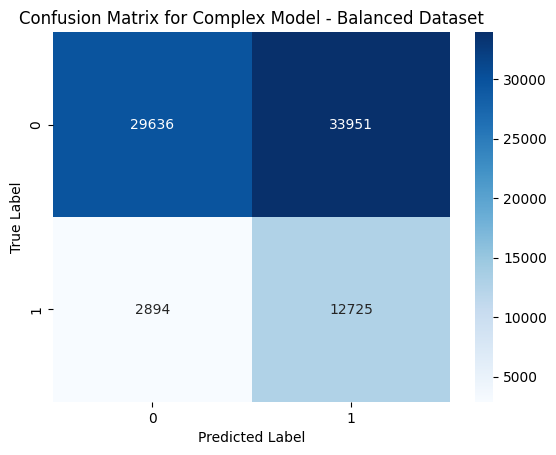

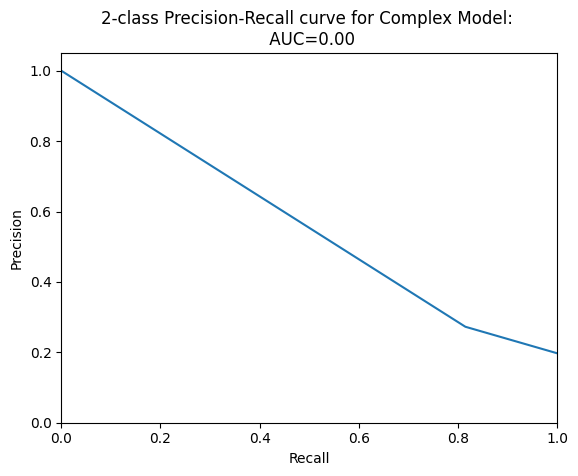

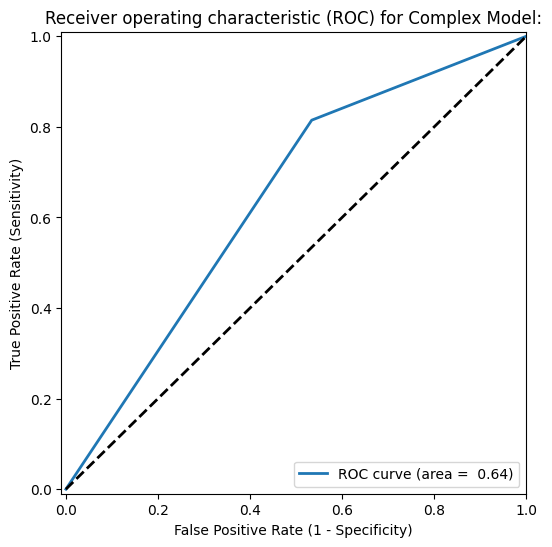

Classification report for the Complex Model
              precision    recall  f1-score   support

         0.0       0.91      0.47      0.62     63587
         1.0       0.27      0.81      0.41     15619

    accuracy                           0.53     79206
   macro avg       0.59      0.64      0.51     79206
weighted avg       0.79      0.53      0.58     79206



In [ ]:
#Confusion Matrix
y_pred = Complex_wide_model_bal.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Model - Balanced Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Model")
print(classification_report(Y_test , y_prediction))

#### Branched model

In [ ]:
# define left and right branches
left_branch = keras.models.Sequential()
left_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim))
right_branch = keras.models.Sequential()
right_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim))

# concatenate the outputs of the two branches
input_layer = keras.layers.Input(shape=(dim,))
merged = keras.layers.Concatenate(axis=1)([left_branch(input_layer), right_branch(input_layer)])

# define the rest of the model
output_layer = keras.layers.Dense(1, activation='sigmoid')(merged)
Branched_model_bal = keras.models.Model(inputs=[input_layer], outputs=[output_layer])


Branched_model_bal.compile(loss="binary_crossentropy",
                       optimizer=keras.optimizers.Adam(learning_rate=lr),
                       metrics=["accuracy"])

In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Branched_model_bal_history = Branched_model_bal.fit(X_train_bal, Y_train_bal, batch_size=batch_size, epochs=epochs,
                                            validation_split=(0.2),
                                            shuffle=True)
print("Evaluation - Full Dataset")
Branched_model_bal.evaluate(X_test, Y_test)

Epoch 1/10
993/993 [==============================] - 4s 3ms/step - loss: 0.6125 - accuracy: 0.6643 - val_loss: 0.8786 - val_accuracy: 0.3937
Epoch 2/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5935 - accuracy: 0.6846 - val_loss: 0.8826 - val_accuracy: 0.4057
Epoch 3/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5921 - accuracy: 0.6860 - val_loss: 0.8981 - val_accuracy: 0.3883
Epoch 4/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5914 - accuracy: 0.6869 - val_loss: 0.8228 - val_accuracy: 0.4589
Epoch 5/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5911 - accuracy: 0.6873 - val_loss: 0.8976 - val_accuracy: 0.3900
Epoch 6/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5906 - accuracy: 0.6866 - val_loss: 0.8579 - val_accuracy: 0.4248
Epoch 7/10
993/993 [==============================] - 3s 3ms/step - loss: 0.5901 - accuracy: 0.6875 - val_loss: 0.8303 - val_accuracy: 0.4577
Epoch 

[0.7697794437408447, 0.5122718214988708]

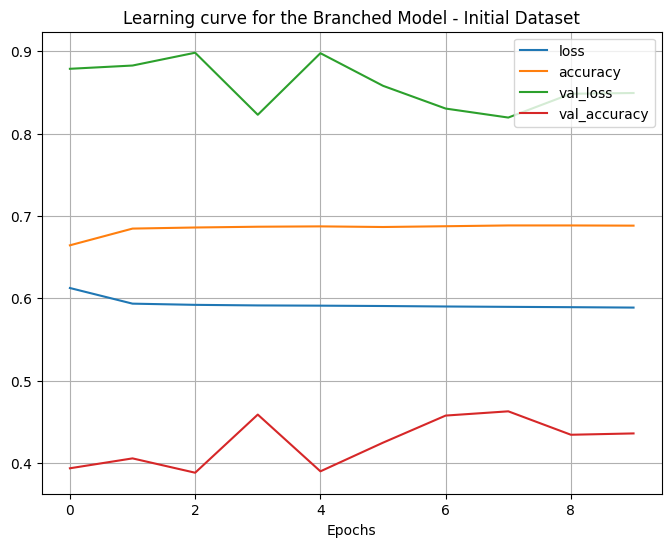

In [ ]:
#Plot the learning curve
pd.DataFrame(Branched_model_bal_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Branched Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 4s 1ms/step


0.5122717975910915

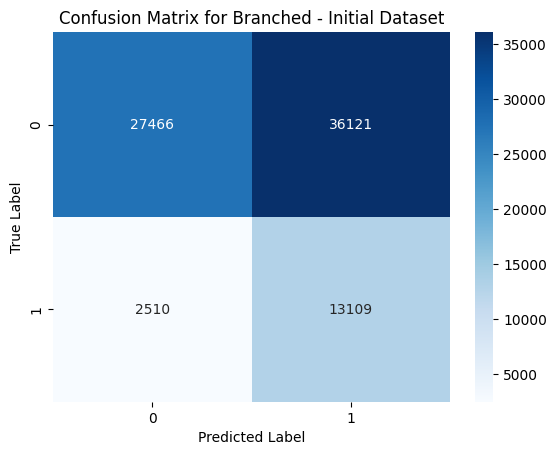

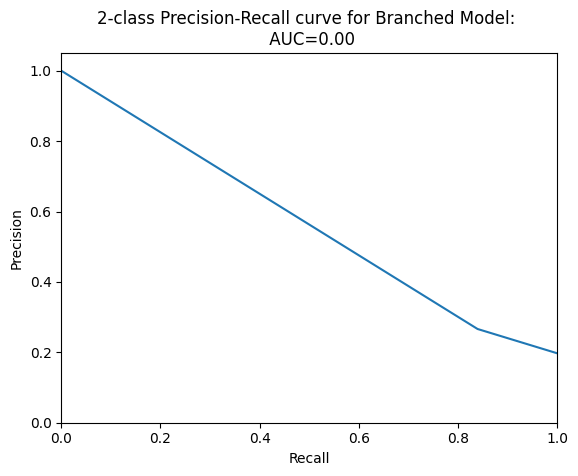

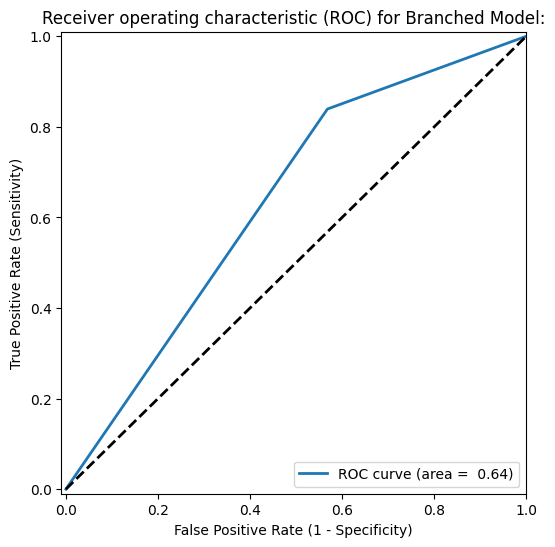

Classification report for the Branched Model
              precision    recall  f1-score   support

         0.0       0.92      0.43      0.59     63587
         1.0       0.27      0.84      0.40     15619

    accuracy                           0.51     79206
   macro avg       0.59      0.64      0.50     79206
weighted avg       0.79      0.51      0.55     79206



In [ ]:
#Confusion Matrix
y_pred = Branched_model_bal.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Branched - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Branched Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Branched Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Branched Model")
print(classification_report(Y_test , y_prediction))

## Define the Models for the Macro data

#### Basic

In [ ]:
#Basic Model 

Basic_model_macro = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(16, activation="relu", kernel_initializer='he_uniform', input_shape=(dim_macro,)),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

Basic_model_macro.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [ ]:
#Fit the basic model and evaluate it on the whole dataset
Basic_model_macro_history = Basic_model_macro.fit(X_train_macro, Y_train_macro, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset"), 
Basic_model_macro.evaluate(X_test_macro, Y_test_macro)

Epoch 1/10
2535/2535 [==============================] - 9s 3ms/step - loss: 0.4411 - accuracy: 0.8096 - val_loss: 0.4466 - val_accuracy: 0.8069
Epoch 2/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4407 - accuracy: 0.8099 - val_loss: 0.4463 - val_accuracy: 0.8051
Epoch 3/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4403 - accuracy: 0.8097 - val_loss: 0.4469 - val_accuracy: 0.8057
Epoch 4/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4400 - accuracy: 0.8099 - val_loss: 0.4466 - val_accuracy: 0.8063
Epoch 5/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4396 - accuracy: 0.8101 - val_loss: 0.4461 - val_accuracy: 0.8064
Epoch 6/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4393 - accuracy: 0.8104 - val_loss: 0.4477 - val_accuracy: 0.8058
Epoch 7/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4390 - accuracy: 0.8101 - val_loss: 0.4469 - val_accuracy:

[0.447765052318573, 0.8062394261360168]

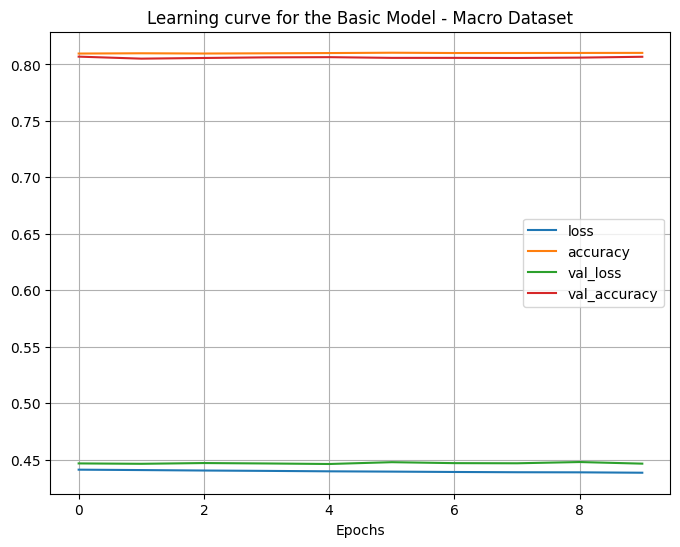

In [ ]:
#Plot the learning curve
pd.DataFrame(Basic_model_macro_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Basic Model - Macro Dataset")    
plt.show()

2476/2476 [==============================] - 4s 2ms/step


0.8062394263060879

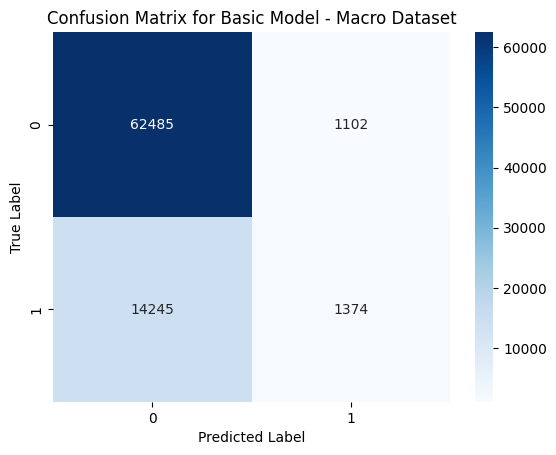

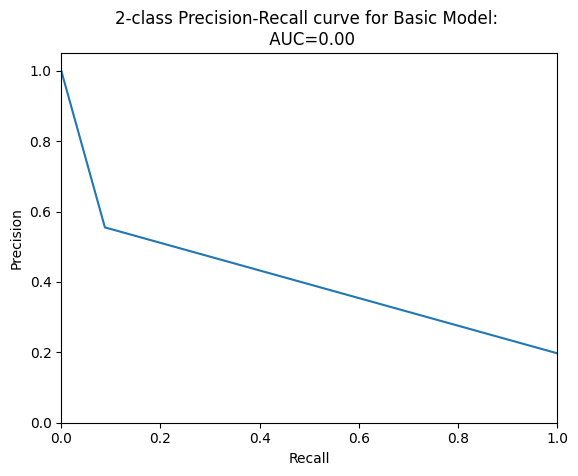

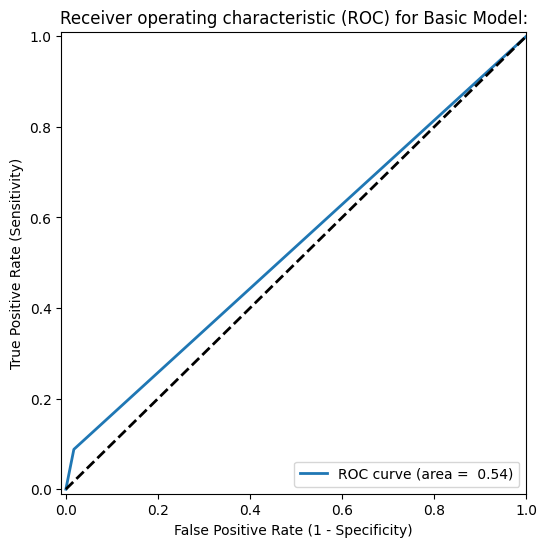

Classification report for the Basic Model
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89     63587
         1.0       0.55      0.09      0.15     15619

    accuracy                           0.81     79206
   macro avg       0.68      0.54      0.52     79206
weighted avg       0.76      0.81      0.74     79206



In [ ]:
#Confusion Matrix
y_pred = Basic_model_macro.predict(X_test_macro)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test_macro, y_prediction)
display(accuracy_score(Y_test_macro, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Basic Model - Macro Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test_macro , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Basic Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test_macro, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Basic Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Basic Model")
print(classification_report(Y_test_macro , y_prediction))

#### Complex Model

In [ ]:
#Complex Model
Complex_model_macro = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu',kernel_initializer='he_uniform', input_shape=(dim_macro,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

Complex_model_macro.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [ ]:
#Fit the Complex model and evaluate it on the whole dataset
Complex_model_macro_history = Complex_model_macro.fit(X_train_macro, Y_train_macro, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Complex_model_macro.evaluate(X_test_macro, Y_test_macro)

Epoch 1/10
2535/2535 [==============================] - 13s 4ms/step - loss: 0.5053 - accuracy: 0.7875 - val_loss: 0.4609 - val_accuracy: 0.8032
Epoch 2/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4656 - accuracy: 0.8046 - val_loss: 0.4569 - val_accuracy: 0.8034
Epoch 3/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4583 - accuracy: 0.8049 - val_loss: 0.4519 - val_accuracy: 0.8032
Epoch 4/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4545 - accuracy: 0.8051 - val_loss: 0.4493 - val_accuracy: 0.8045
Epoch 5/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4522 - accuracy: 0.8051 - val_loss: 0.4490 - val_accuracy: 0.8041
Epoch 6/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4511 - accuracy: 0.8049 - val_loss: 0.4478 - val_accuracy: 0.8049
Epoch 7/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4504 - accuracy: 0.8057 - val_loss: 0.4482 - val_ac

[0.44835007190704346, 0.8063656687736511]

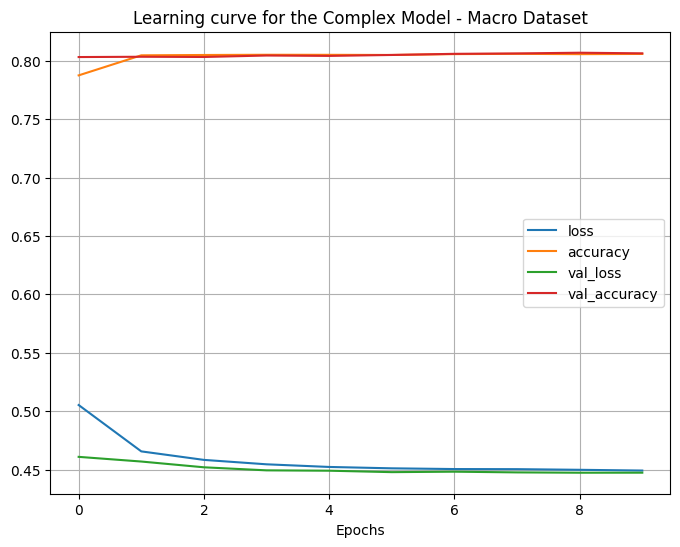

In [ ]:
#Plot the learning curve
pd.DataFrame(Complex_model_macro_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex Model - Macro Dataset")    
plt.show()

2476/2476 [==============================] - 4s 2ms/step


0.8063656793677246

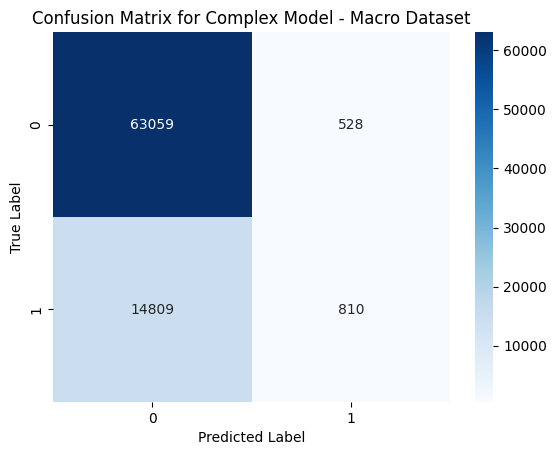

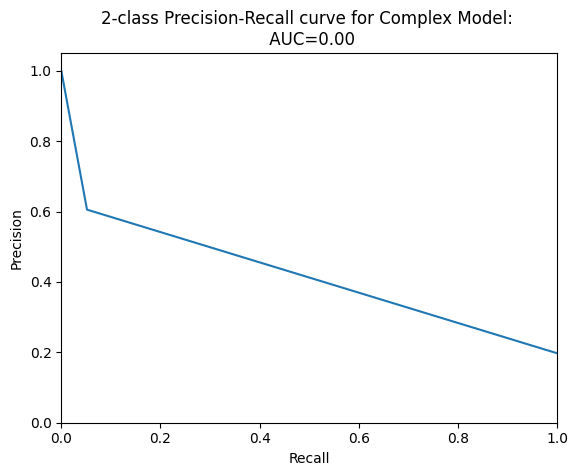

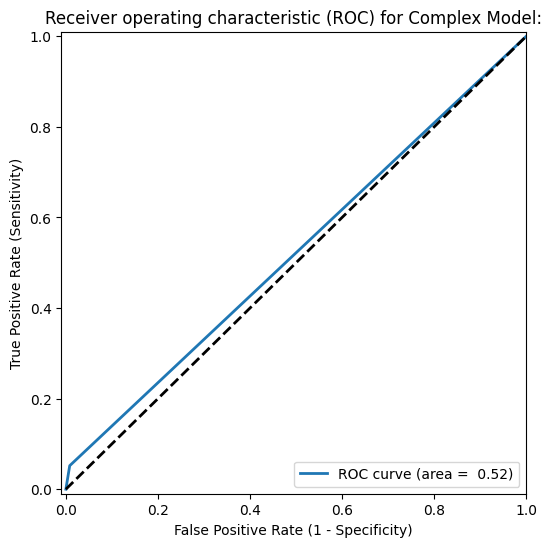

Classification report for the Complex Model
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     63587
         1.0       0.61      0.05      0.10     15619

    accuracy                           0.81     79206
   macro avg       0.71      0.52      0.49     79206
weighted avg       0.77      0.81      0.73     79206



In [ ]:
#Confusion Matrix
y_pred = Complex_model_macro.predict(X_test_macro)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test_macro, y_prediction)
display(accuracy_score(Y_test_macro, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Model - Macro Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test_macro , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test_macro, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Model")
print(classification_report(Y_test_macro , y_prediction))

#### Complex Wide Model

In [ ]:
#Coplex Model with more neurons to make it wider
Complex_wide_model_macro= keras.models.Sequential([
    keras.layers.Dense(256, activation='relu',kernel_initializer='he_uniform', input_shape=(dim_macro,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

Complex_wide_model_macro.compile(loss="binary_crossentropy",
                           optimizer=keras.optimizers.Adam(learning_rate=lr),
                           metrics=["accuracy"])

In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Complex_wide_model_macro_history = Complex_wide_model_macro.fit(X_train_macro, Y_train_macro, batch_size=batch_size, epochs=epochs, 
                                                    validation_split=(0.2),
                                                    shuffle=True)
print("Evaluation - Full Dataset")
Complex_wide_model_macro.evaluate(X_test_macro, Y_test_macro)

Epoch 1/10
2535/2535 [==============================] - 29s 10ms/step - loss: 0.7117 - accuracy: 0.7928 - val_loss: 0.5302 - val_accuracy: 0.8059
Epoch 2/10
2535/2535 [==============================] - 26s 10ms/step - loss: 0.4954 - accuracy: 0.8056 - val_loss: 0.4772 - val_accuracy: 0.8070
Epoch 3/10
2535/2535 [==============================] - 26s 10ms/step - loss: 0.4738 - accuracy: 0.8056 - val_loss: 0.4669 - val_accuracy: 0.8060
Epoch 4/10
2535/2535 [==============================] - 27s 10ms/step - loss: 0.4690 - accuracy: 0.8063 - val_loss: 0.4660 - val_accuracy: 0.8069
Epoch 5/10
2535/2535 [==============================] - 26s 10ms/step - loss: 0.4668 - accuracy: 0.8065 - val_loss: 0.4656 - val_accuracy: 0.8057
Epoch 6/10
2535/2535 [==============================] - 26s 10ms/step - loss: 0.4652 - accuracy: 0.8063 - val_loss: 0.4628 - val_accuracy: 0.8067
Epoch 7/10
2535/2535 [==============================] - 25s 10ms/step - loss: 0.4630 - accuracy: 0.8064 - val_loss: 0.4617 -

[0.46226775646209717, 0.8036133646965027]

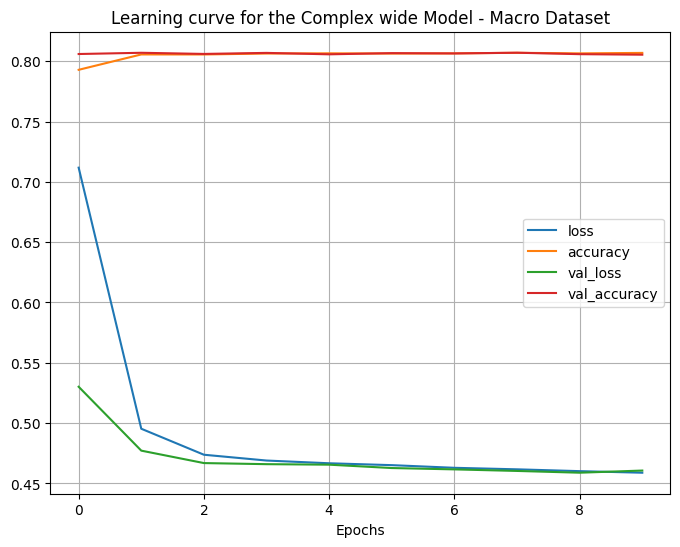

In [ ]:
#Plot the learning curve
pd.DataFrame(Complex_wide_model_macro_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex wide Model - Macro Dataset")    
plt.show()

2476/2476 [==============================] - 6s 2ms/step


0.8036133626240436

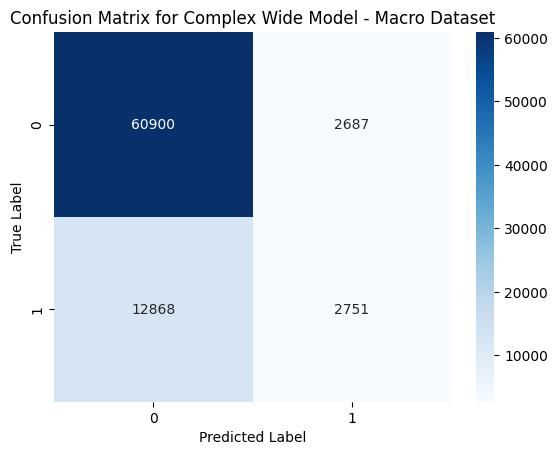

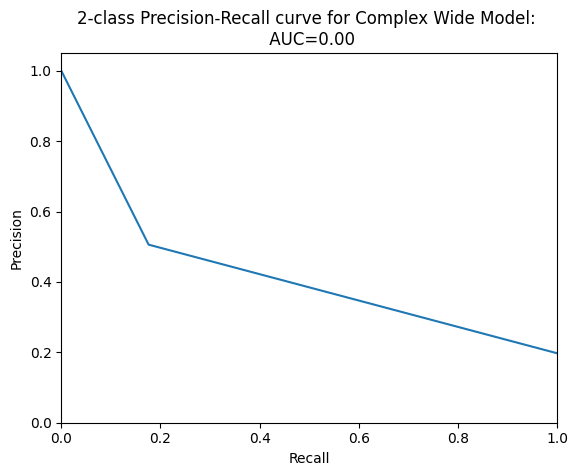

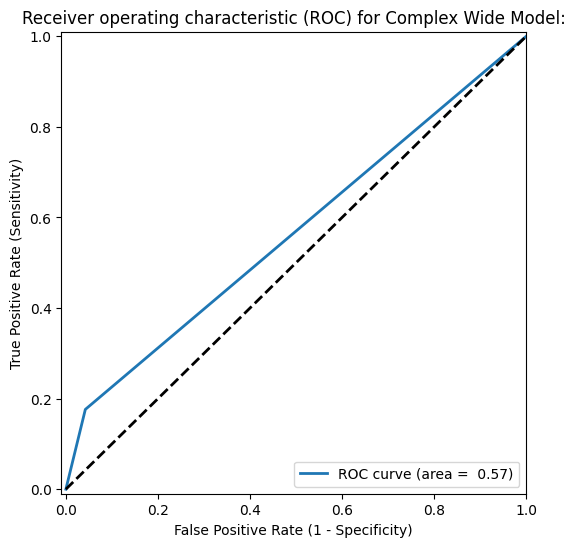

Classification report for the Complex Wide Model
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     63587
         1.0       0.51      0.18      0.26     15619

    accuracy                           0.80     79206
   macro avg       0.67      0.57      0.57     79206
weighted avg       0.76      0.80      0.76     79206



In [ ]:
#Confusion Matrix
y_pred = Complex_wide_model_macro.predict(X_test_macro)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test_macro, y_prediction)
display(accuracy_score(Y_test_macro, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Wide Model - Macro Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test_macro , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Wide Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test_macro, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Wide Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Wide Model")
print(classification_report(Y_test_macro , y_prediction))

#### Branched Model

In [ ]:
left_branch = keras.models.Sequential()
left_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim_macro))
right_branch = keras.models.Sequential()
right_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim_macro))

# concatenate the outputs of the two branches
input_layer = keras.layers.Input(shape=(dim_macro,))
merged = keras.layers.Concatenate(axis=1)([left_branch(input_layer), right_branch(input_layer)])

# define the rest of the model
output_layer = keras.layers.Dense(1, activation='sigmoid')(merged)
Branched_model_macro = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

Branched_model_macro.compile(loss="binary_crossentropy",
                       optimizer=keras.optimizers.Adam(learning_rate=lr),
                       metrics=["accuracy"])


In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Branched_model_macro_history = Branched_model_macro.fit(X_train_macro, Y_train_macro, batch_size=batch_size, epochs=epochs,
                                            validation_split=(0.2),
                                            shuffle=True)
print("Evaluation - Full Dataset")
Branched_model_macro.evaluate(X_test_macro, Y_test_macro)

Epoch 1/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4636 - accuracy: 0.8016 - val_loss: 0.4485 - val_accuracy: 0.8064
Epoch 2/10
2535/2535 [==============================] - 7s 3ms/step - loss: 0.4477 - accuracy: 0.8072 - val_loss: 0.4474 - val_accuracy: 0.8059
Epoch 3/10
2535/2535 [==============================] - 7s 3ms/step - loss: 0.4470 - accuracy: 0.8071 - val_loss: 0.4473 - val_accuracy: 0.8061
Epoch 4/10
2535/2535 [==============================] - 7s 3ms/step - loss: 0.4466 - accuracy: 0.8076 - val_loss: 0.4473 - val_accuracy: 0.8059
Epoch 5/10
2535/2535 [==============================] - 9s 3ms/step - loss: 0.4462 - accuracy: 0.8076 - val_loss: 0.4476 - val_accuracy: 0.8059
Epoch 6/10
2535/2535 [==============================] - 9s 4ms/step - loss: 0.4458 - accuracy: 0.8081 - val_loss: 0.4467 - val_accuracy: 0.8062
Epoch 7/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4453 - accuracy: 0.8080 - val_loss: 0.4470 - val_accuracy:

[0.4477653205394745, 0.8067444562911987]

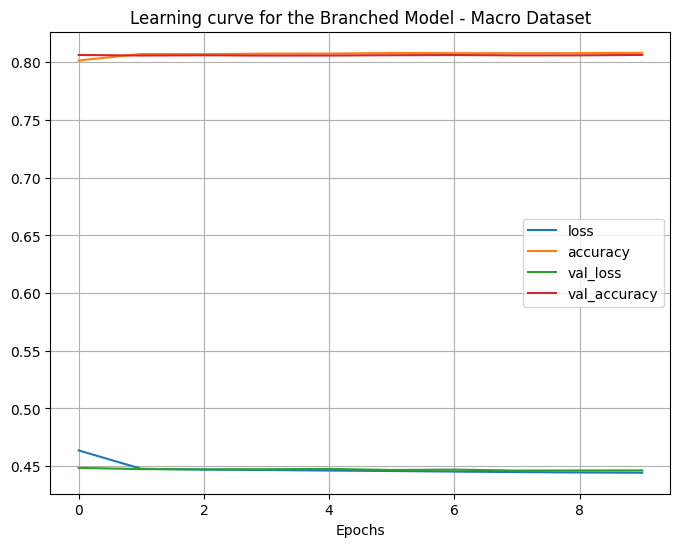

In [ ]:
#Plot the learning curve
pd.DataFrame(Branched_model_macro_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Branched Model - Macro Dataset")    
plt.show()

2476/2476 [==============================] - 4s 2ms/step


0.8067444385526349

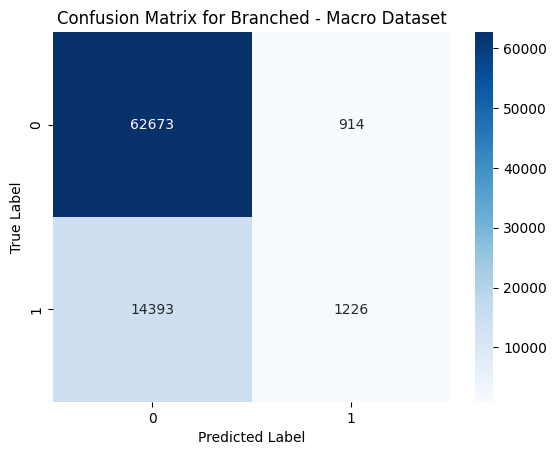

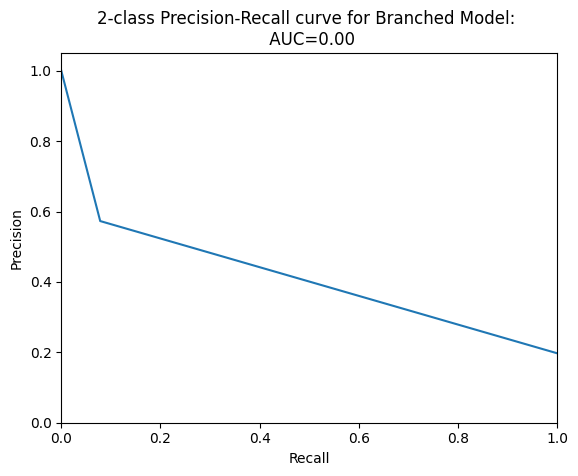

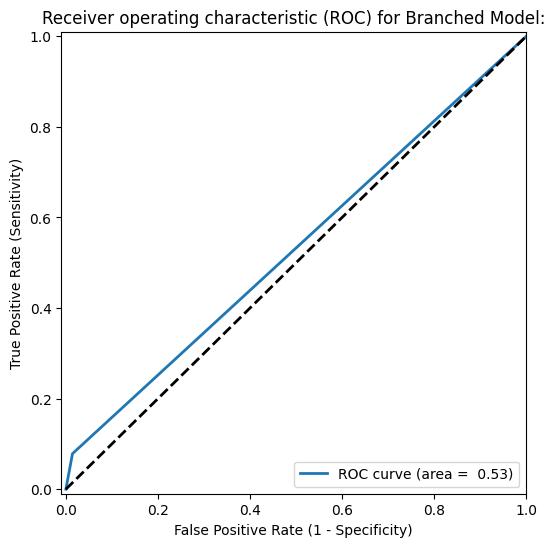

Classification report for the Branched Model
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     63587
         1.0       0.57      0.08      0.14     15619

    accuracy                           0.81     79206
   macro avg       0.69      0.53      0.51     79206
weighted avg       0.77      0.81      0.74     79206



In [ ]:
#Confusion Matrix
y_pred = Branched_model_macro.predict(X_test_macro)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test_macro, y_prediction)
display(accuracy_score(Y_test_macro, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Branched - Macro Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test_macro , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Branched Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test_macro, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Branched Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Branched Model")
print(classification_report(Y_test_macro , y_prediction))

#### Fitting the models

## Linear Regression

In [ ]:
ols = LinearRegression().fit(X_train, Y_train)

In [ ]:
# Classification Report
y_hat = ols.predict(X_test)
print("Classification Report for OLS - Initial Dataset")
print(r2_score(Y_test , y_hat))

Classification Report for OLS - Initial Dataset
-1.4745171166846026e+20


In [ ]:
ols_bal = LinearRegression().fit(X_train_bal, Y_train_bal)

In [ ]:
# Classification Report
y_hat = ols_bal.predict(X_test)
print("Classification Report for OLS - Balanced Dataset")
print(r2_score(Y_test , y_hat))

Classification Report for OLS - Balanced Dataset
-1.9509149919194348e+18


In [ ]:
ols_macro = LinearRegression().fit(X_train_macro, Y_train_macro)

In [ ]:
y_hat_macro = ols_macro.predict(X_test_macro)
print("Classification Report for OLS - Macro Dataset")
print(r2_score(Y_test_macro , y_hat_macro))

Classification Report for OLS - Macro Dataset
-1.5832427015555674e+18


# Random Forest

In [184]:
# Create the random grid
parameters = {'n_estimators': [500, 750, 1000],
               'max_depth': [100, 150, None],
               'min_samples_split': [1, 5, 10],
               'min_samples_leaf': [1, 5, 10],
               'criterion': ['accuracy'],}

In [185]:
rf = RandomForestRegressor(n_jobs = -1)
# pick 81 potential subjects
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 81, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END criterion=accuracy, max_depth=100, min_samples_leaf=1, min_samples_split=1, n_estimators=500; total time=   0.2s
[CV] END criterion=accuracy, max_depth=100, min_samples_leaf=1, min_samples_split=1, n_estimators=500; total time=   0.2s
[CV] END criterion=accuracy, max_depth=100, min_samples_leaf=1, min_samples_split=1, n_estimators=500; total time=   0.2s
[CV] END criterion=accuracy, max_depth=100, min_samples_leaf=1, min_samples_split=1, n_estimators=750; total time=   0.2s
[CV] END criterion=accuracy, max_depth=100, min_samples_leaf=1, min_samples_split=1, n_estimators=750; total time=   0.1s
[CV] END criterion=accuracy, max_depth=100, min_samples_leaf=1, min_samples_split=1, n_estimators=750; total time=   0.2s
[CV] END criterion=accuracy, max_depth=100, min_samples_leaf=1, min_samples_split=1, n_estimators=1000; total time=   0.1s
[CV] END criterion=accuracy, max_depth=100, min_samples_leaf=1, min_samples_split=1

ValueError: 
All the 243 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'absolute_error', 'poisson', 'squared_error'}. Got 'accuracy' instead.


In [ ]:
rf_random.best_params_

In [ ]:
# pick in the region of the best random parameters to fine tune.
# Create the random grid
parameters = {'n_estimators': [700, 750, 800],
               'max_depth': [200, None],
               'min_samples_split': [4, 5, 6],
               'min_samples_leaf': [1, 2],
               'criterion': ['squared_error'],}

In [ ]:
#passing the scoring function in the GridSearchCV
grid = GridSearchCV(RandomForestRegressor(n_jobs=-1), parameters, refit=False, cv=3, verbose=2)

In [ ]:
grid_result = grid.fit(X_train, y_train)

In [ ]:
grid_result.best_params_

In [ ]:
RF_model = RandomForestRegressor(n_estimators= grid_result.best_params_["n_estimators"],
                              max_depth= grid_result.best_params_["max_depth"],
                              min_samples_split= grid_result.best_params_["min_samples_split"],
                              min_samples_leaf= grid_result.best_params_["min_samples_leaf"] ,
                              verbose=2,
                              n_jobs=-1,
                                    )

In [ ]:
RF_history = RF_model.fit(X_train, Y_train)

In [ ]:
#Confusion Matrix
y_pred = RF_model.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for RF - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for RF Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for RF Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the RF Model")
print(classification_report(Y_test , y_prediction))